In [15]:
import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt

from notebooks.zoo_analysis_gpt import missing, full_dups, animal_dups
#from caas_jupyter_tools import display_dataframe_to_user

In [16]:
arff_path = "zoo.arff"


In [17]:

data, meta = arff.loadarff(arff_path)

In [18]:
# декодируем данные
df = pd.DataFrame(data)
for col in df.columns:
    if df[col].dtype == object:  # если колонка строкового типа
        df[col] = df[col].str.decode('utf-8')

In [19]:
df.head(15)

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,true,false,false,true,false,false,true,true,true,true,false,false,4.0,false,false,true,mammal
1,antelope,true,false,false,true,false,false,false,true,true,true,false,false,4.0,true,false,true,mammal
2,bass,false,false,true,false,false,true,true,true,true,false,false,true,0.0,true,false,false,fish
3,bear,true,false,false,true,false,false,true,true,true,true,false,false,4.0,false,false,true,mammal
4,boar,true,false,false,true,false,false,true,true,true,true,false,false,4.0,true,false,true,mammal
5,buffalo,true,false,false,true,false,false,false,true,true,true,false,false,4.0,true,false,true,mammal
6,calf,true,false,false,true,false,false,false,true,true,true,false,false,4.0,true,true,true,mammal
7,carp,false,false,true,false,false,true,false,true,true,false,false,true,0.0,true,true,false,fish
8,catfish,false,false,true,false,false,true,true,true,true,false,false,true,0.0,true,false,false,fish
9,cavy,true,false,false,true,false,false,false,true,true,true,false,false,4.0,false,true,false,mammal


In [22]:
#проверка пропусков
missing = df.isnull().sum()
missing

animal      0
hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

In [29]:
# проверм дубликаты (полные и по 'animal' так как он должен быть уникальным)
full_dups = df.duplicated(keep=False).sum()
animal_dups = df['animal'].duplicated(keep=False).sum()
print(f"There are {full_dups} duplications in the dataset.")
print(f"There are {animal_dups} duplications in the dataset.")

There are 0 duplications in the dataset.
There are 2 duplications in the dataset.


In [34]:
if animal_dups > 0:
    duplicates = df[df['animal'].duplicated(keep=False)].sort_values('animal')
duplicates

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,false,false,true,false,false,true,true,true,true,true,false,false,4.0,false,false,false,amphibian
26,frog,false,false,true,false,false,true,true,true,true,true,true,false,4.0,false,false,false,amphibian


In [35]:
#из таблицы выше явно видны два дубликата!!

In [36]:
#баланс классов
type_counts = df['type'].value_counts()
type_counts

type
mammal          41
bird            20
fish            13
invertebrate    10
insect           8
reptile          5
amphibian        4
Name: count, dtype: int64

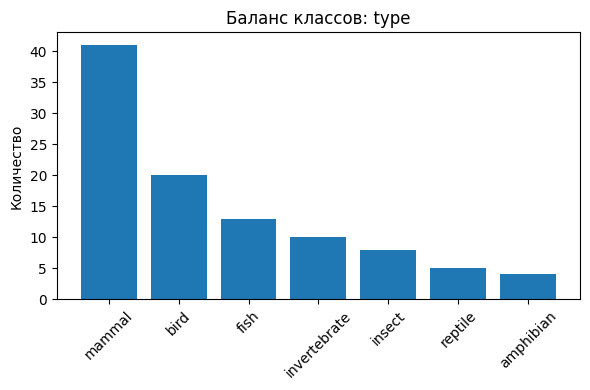

In [38]:
plt.figure(figsize = (6,4))
plt.bar(type_counts.index, type_counts.values)
plt.title('Баланс классов: type')
plt.ylabel('Количество')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()